This file is for analyzing the DockQ results.

First we look at histograms of the Capri classes.

In [77]:
import pandas as pd
import json
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from statannotations.Annotator import Annotator
from pandas.plotting import table
import scienceplots

In [78]:
# Read in the data
ai = pd.read_csv('./project_pipeline/data/ai_dockq_results.csv').astype('object')
md = pd.read_csv('./project_pipeline/data/md_dockq_results.csv').astype('object')

plt.style.use('science')

## Frequencies of Capri Classes

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


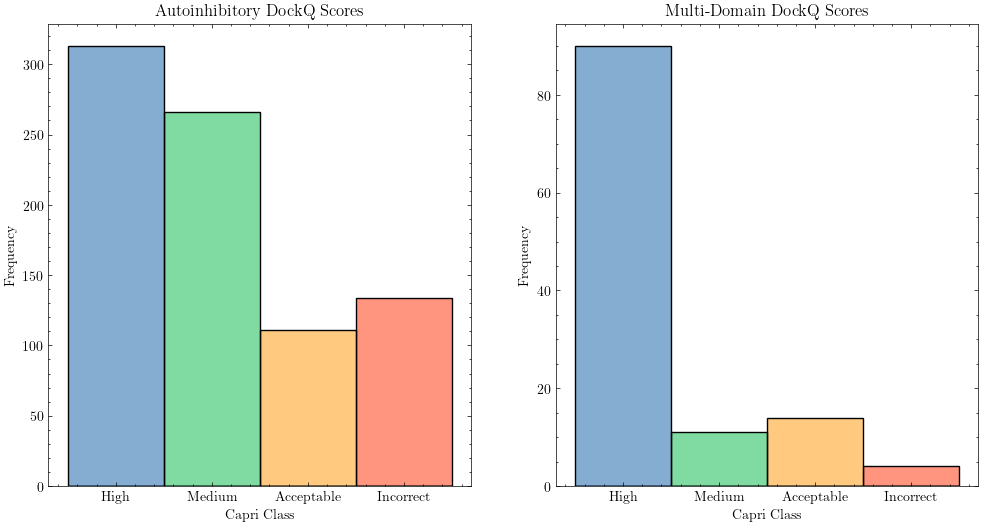

In [79]:
# Make the capri class categorical
ai['capri'] = pd.Categorical(ai['capri'], ['High', 'Medium', 'Acceptable', 'Incorrect'])
md['capri'] = pd.Categorical(md['capri'], ['High', 'Medium', 'Acceptable', 'Incorrect'])

# Make histograms of both
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Autoinhibitory DockQ
sns.histplot(ai, x='capri', hue='capri', ax=ax[0])
ax[0].set_title('Autoinhibitory DockQ Scores')
ax[0].set_xlabel('Capri Class')
ax[0].set_ylabel('Frequency')
ax[0].legend(frameon=False)
# MD DockQ
sns.histplot(md, x='capri', hue='capri', ax=ax[1])
ax[1].set_title('Multi-Domain DockQ Scores')
ax[1].set_xlabel('Capri Class')
ax[1].set_ylabel('Frequency')
ax[1].legend(frameon=False)

plt.savefig('./project_pipeline/data/figures/dockq_histograms.png', dpi=300)

## Distributions of Fnat, Fnonnat, irms, and LRMS

In [80]:
# Concatenate dataframes with classifications
ai['type'] = 'Autoinhibitory'
md['type'] = 'Multi-Domain'

df = pd.concat([ai, md])

In [81]:
types = df['type'].unique()

print(len(types))

2


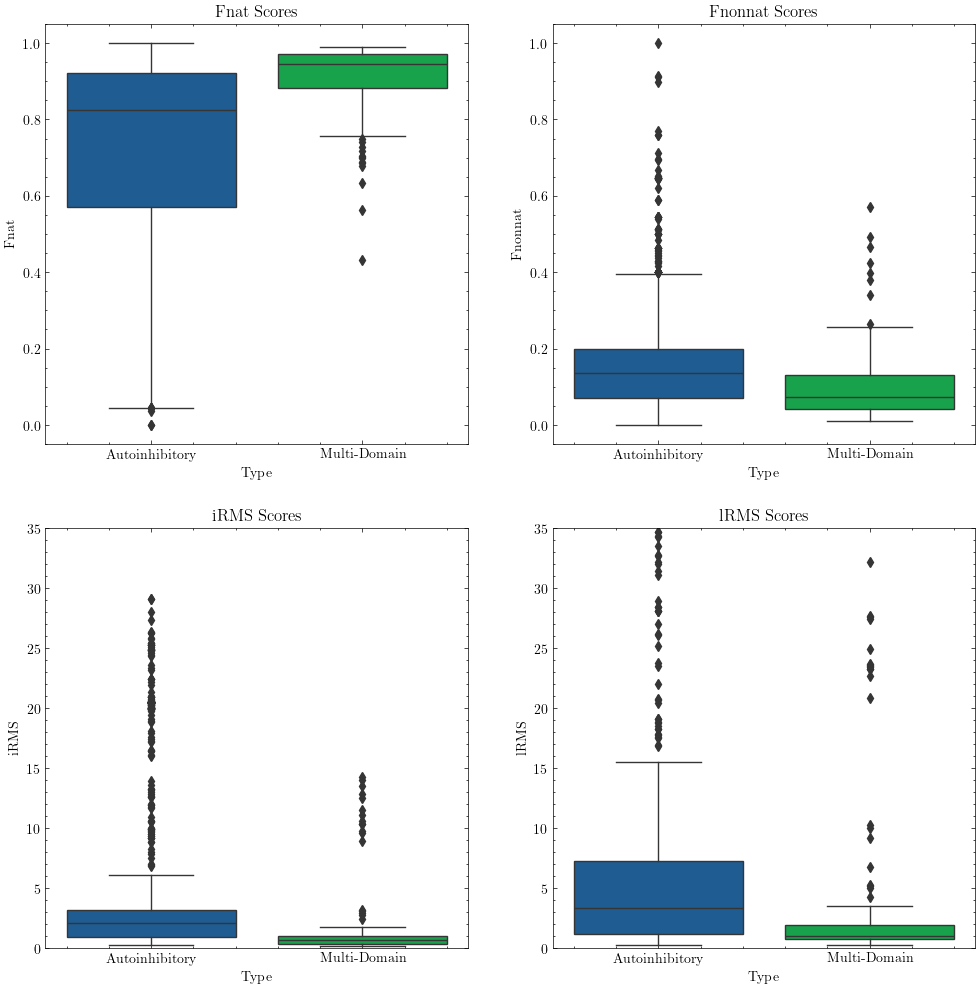

In [82]:
# Make boxplots of the four different scores
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

# Fnat
sns.boxplot(data=df, x='type', y='fnat', ax=ax[0, 0])
ax[0, 0].set_title('Fnat Scores')
ax[0, 0].set_ylabel('Fnat')
ax[0, 0].set_xlabel('Type')

# Fnonnat
sns.boxplot(data=df, x='type', y='fnonnat', ax=ax[0, 1])
ax[0, 1].set_title('Fnonnat Scores')
ax[0, 1].set_ylabel('Fnonnat')
ax[0, 1].set_xlabel('Type')

# iRMS
sns.boxplot(data=df, x='type', y='irms', ax=ax[1, 0])
ax[1, 0].set_title('iRMS Scores')
ax[1, 0].set_ylabel('iRMS')
ax[1, 0].set_xlabel('Type')
ax[1, 0].set_ylim(0, 35)
# lRMS
sns.boxplot(data=df, x='type', y='lrms', ax=ax[1, 1])
ax[1, 1].set_title('lRMS Scores')
ax[1, 1].set_ylabel('lRMS')
ax[1, 1].set_xlabel('Type')
ax[1, 1].set_ylim(0, 35)


# # Annotate statistical significance
# pairs = ['Autoinhibitory' 'Multi-Domain']
# order = ['Autoinhibitory', 'Multi-Domain']
# annotator = Annotator(ax[1, 1], pairs, data=df, x='type', y='lrms', order=order, hue='type')
# annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
# annotator.apply_and_annotate()

plt.savefig('./project_pipeline/data/figures/dockq_boxplots.png', dpi=300)


## Capri Classes for Two-State Proteins

In [83]:
# Get two-state proteins
twodf = pd.read_csv('./project_pipeline/data/two_states.tsv', sep='\t').astype('object')
twolist = twodf['uniprot'].unique().tolist()

# Subset dataframe
two = ai[ai['uniprot'].isin(twolist)].reset_index(drop=True)

# Concatenate dataframes with classifications
two['type'] = 'Two-State'

df2 = pd.concat([two, md])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


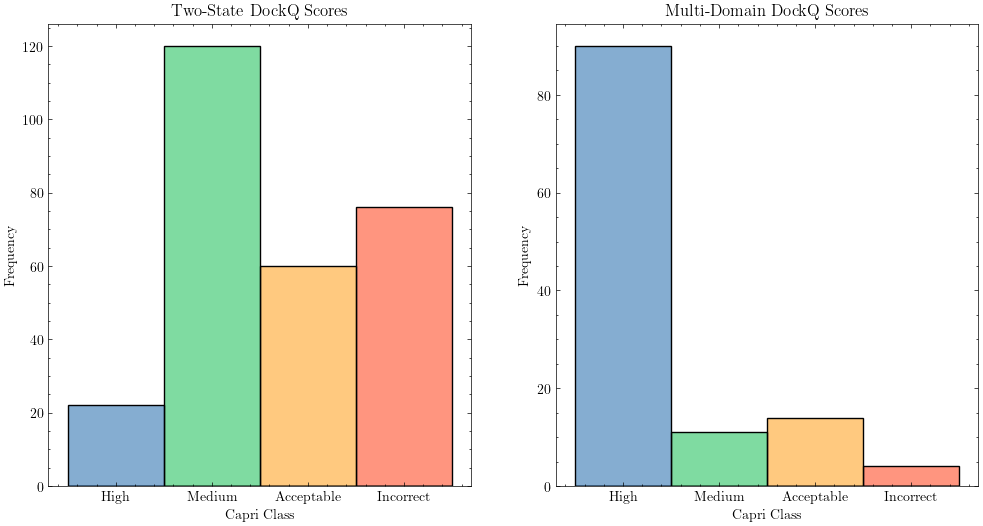

In [84]:
# Make capri classes categorical for two-state
two['capri'] = pd.Categorical(two['capri'], ['High', 'Medium', 'Acceptable', 'Incorrect'])

# Make histograms of both
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Autoinhibitory DockQ
sns.histplot(two, x='capri', hue='capri', ax=ax[0])
ax[0].set_title('Two-State DockQ Scores')
ax[0].set_xlabel('Capri Class')
ax[0].set_ylabel('Frequency')
ax[0].legend(frameon=False)
# MD DockQ
sns.histplot(md, x='capri', hue='capri', ax=ax[1])
ax[1].set_title('Multi-Domain DockQ Scores')
ax[1].set_xlabel('Capri Class')
ax[1].set_ylabel('Frequency')
ax[1].legend(frameon=False)

plt.savefig('./project_pipeline/data/figures/twoState_dockq_histograms.png', dpi=300)

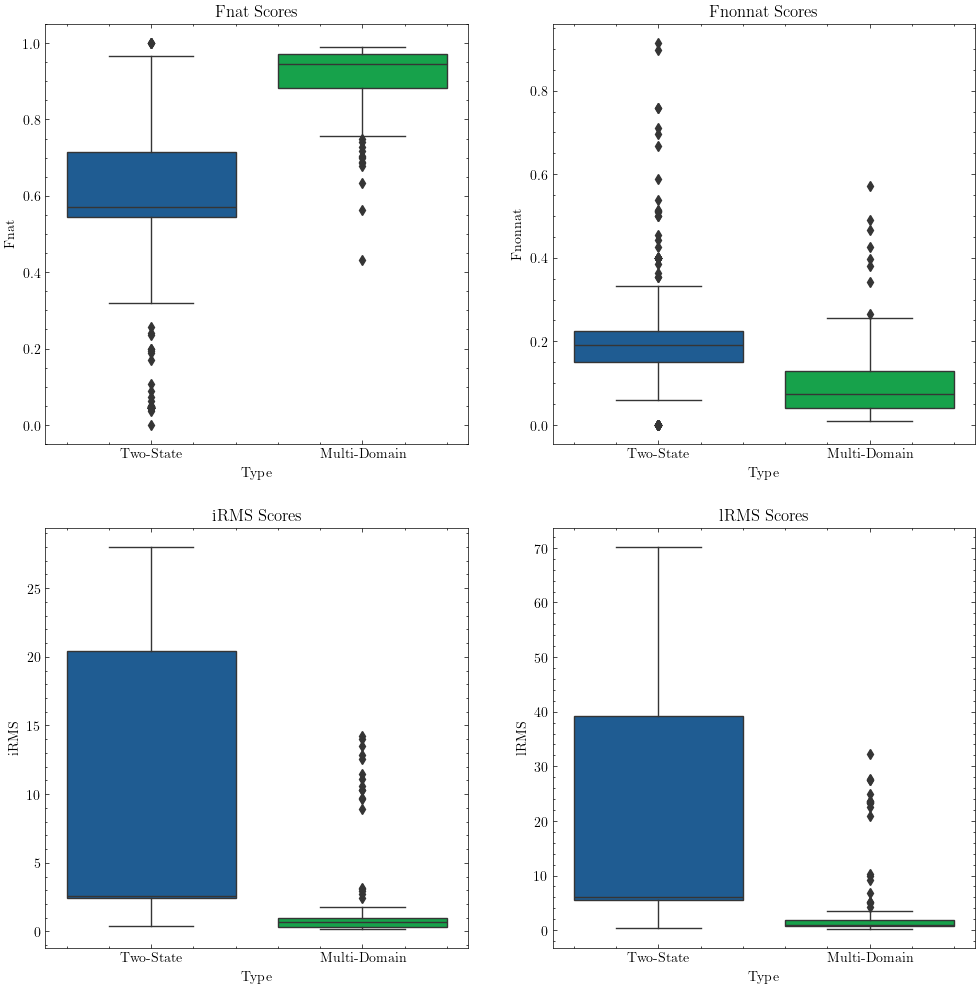

In [85]:
# Make boxplots of the four different scores
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

# Fnat
sns.boxplot(data=df2, x='type', y='fnat', ax=ax[0, 0])
ax[0, 0].set_title('Fnat Scores')
ax[0, 0].set_ylabel('Fnat')
ax[0, 0].set_xlabel('Type')

# Fnonnat
sns.boxplot(data=df2, x='type', y='fnonnat', ax=ax[0, 1])
ax[0, 1].set_title('Fnonnat Scores')
ax[0, 1].set_ylabel('Fnonnat')
ax[0, 1].set_xlabel('Type')

# iRMS
sns.boxplot(data=df2, x='type', y='irms', ax=ax[1, 0])
ax[1, 0].set_title('iRMS Scores')
ax[1, 0].set_ylabel('iRMS')
ax[1, 0].set_xlabel('Type')
# lRMS
sns.boxplot(data=df2, x='type', y='lrms', ax=ax[1, 1])
ax[1, 1].set_title('lRMS Scores')
ax[1, 1].set_ylabel('lRMS')
ax[1, 1].set_xlabel('Type')


# # Annotate statistical significance
# pairs = ['Autoinhibitory' 'Multi-Domain']
# order = ['Autoinhibitory', 'Multi-Domain']
# annotator = Annotator(ax[1, 1], pairs, data=df, x='type', y='lrms', order=order, hue='type')
# annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
# annotator.apply_and_annotate()

plt.savefig('./project_pipeline/data/figures/twoState_dockq_boxplots.png', dpi=300)